In [22]:
import netCDF4 as nc
import os
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import datetime
from scipy import interpolate
import cartopy.crs as ccrs
import cartopy
import cmocean

%matplotlib inline

In [23]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

In [24]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

## Open txt file position data

In [25]:
SB_ADCP = pd.read_excel("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SBADCP_PF.xlsx", header=0)
SB_Iskant = pd.read_excel("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SBIskant_PF.xlsx", header=0)

In [61]:
SB_ADCP = pd.read_csv('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_ADCP_Position.csv', header=0, engine='python',names=['time','Lat','Long'])
SB_Iskant = pd.read_csv("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_Iskant_Position.csv", header=0, engine='python',names=['time','Lat','Long'])

In [128]:
SB_Iskant['time'] = pd.to_datetime(SB_Iskant.time)
SB_ADCP['time'] = pd.to_datetime(SB_ADCP.time)

# Load bathymetry

In [64]:
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [65]:
## Plot Barents Sea Bathy

Text(0, 0.5, 'Depth (m)')

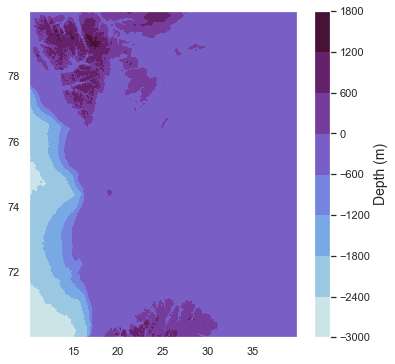

In [66]:
plt.figure(figsize=(6,6))

# Plot
im = plt.contourf(BS_topo.variables['lon'][:],BS_topo.variables['lat'][:],BS_topo.variables['elevation'][:], cmap=cmocean.cm.dense)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

# Select region of interest

In [214]:
lat_lim = [70, 77]
lon_lim = [22, 33.5]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1
bathy[bathy < 0] = 1 

In [227]:
lat_lim_zoom = [75, 77]
lon_lim_zoom = [29.5, 33.5]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim_zoom[0]) & (BS_topo.variables['lat'][:].data<lat_lim_zoom[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim_zoom[0]) & (BS_topo.variables['lon'][:].data<lon_lim_zoom[1])

lats_zoom = BS_topo.variables['lat'][:].data[lat_lim_index]
lons_zoom = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy_zoom = bathy_lat[:,lon_lim_index]*-1
bathy_zoom[bathy_zoom < 0] = 0

# Make map

Text(0.5, 1.0, 'Barents Sea Autonomous Survey: May 16 - July 12')

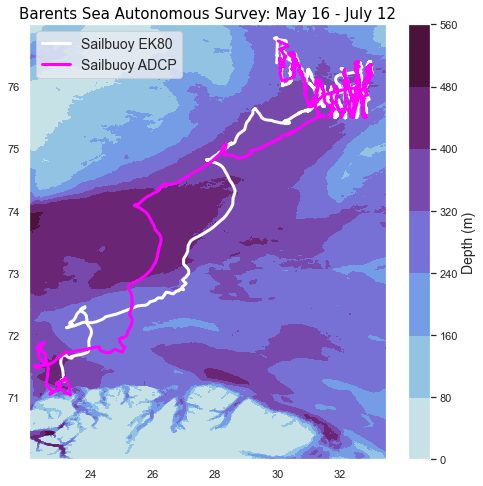

In [231]:
plt.figure(figsize=(8,8))

# Plot
im = plt.contourf(lons,lats,bathy, cmap=cmocean.cm.dense)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

plt.plot(SB_Iskant['Long'],SB_Iskant['Lat'], 'w', linewidth=3, label='Sailbuoy EK80')
plt.plot(SB_ADCP['Long'],SB_ADCP['Lat'], 'magenta', linewidth=3,label='Sailbuoy ADCP')

plt.legend(fontsize=14)
plt.title('Barents Sea Autonomous Survey: May 16 - July 12', title_font)

In [217]:
## Add UVP6 Seaglider
fname_sg150 = glob.glob('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SG150_PolarFront/*.nc')


lat_150 = np.zeros((0))
lon_150 = np.zeros((0))

for ind in np.arange(len(fname_sg150)):
    sg_150 = nc.Dataset(fname_sg150[ind])
    lat_150 = np.append(lat_150, sg_150.variables['avg_latitude'][0])
    lon_150 = np.append(lon_150, sg_150.variables['log_gps_lon'][0])



In [218]:
# Load ecoSeaglider
fname_sg644 = glob.glob('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SG644_PolarFront/*.nc')

lat_644 = np.zeros((0))
lon_644 = np.zeros((0))

for ind in np.arange(len(fname_sg644)):
    sg_644 = nc.Dataset(fname_sg644[ind])
    lat_644 = np.append(lat_644, sg_644.variables['avg_latitude'][0])
    lon_644 = np.append(lon_644, sg_644.variables['log_gps_lon'][0])

Text(0.5, 1.0, 'Gliders tracks: May 16 - May 21 ')

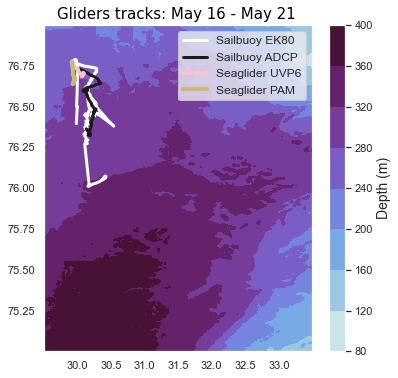

In [219]:
plt.figure(figsize=(6,6))

# Plot
im = plt.contourf(lons_zoom,lats_zoom,bathy_zoom, cmap=cmocean.cm.dense)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

plt.plot(SB_Iskant['Long'][1:850],SB_Iskant['Lat'][1:850], 'w', linewidth=3, label='Sailbuoy EK80')
plt.plot(SB_ADCP['Long'][1:850],SB_ADCP['Lat'][1:850], 'k', linewidth=3,label='Sailbuoy ADCP')
plt.plot(lon_150,lat_150, 'pink', linewidth=4,label='Seaglider UVP6')
plt.plot(lon_644,lat_644, 'y', linewidth=4,label='Seaglider PAM')

plt.legend(fontsize=12)
plt.title('Gliders tracks: May 16 - May 21 ', title_font)


# Highlight activity

## Krill-like
Very stront backscatter from dense layers of krill seem to be present. Elongated periods of strong backscatter

In [220]:
krill_t1 = pd.to_datetime("2021-5-17 10:00:00Z")
krill_t2 = pd.to_datetime("2021-5-17 15:00:00Z")
krill_1 = SB_Iskant.index[(SB_Iskant['time'] > krill_t1) & (SB_Iskant['time'] < krill_t2)]


## Backscatter throughout water column

In [221]:
whole_t1 = pd.to_datetime("2021-6-26 01:00:00Z")
whole_t2 = pd.to_datetime("2021-6-27 20:00:00Z")
whole_1 = SB_Iskant.index[(SB_Iskant['time'] > whole_t1) & (SB_Iskant['time'] < whole_t2)]


## Active layer within epipelagic layer (later depth could be interesting)

In [222]:
layer_t1 = pd.to_datetime("2021-5-20 08:00:00Z")
layer_t2 = pd.to_datetime("2021-5-22 03:00:00Z")
layer_1 = SB_Iskant.index[(SB_Iskant['time'] > layer_t1) & (SB_Iskant['time'] < layer_t2)]

layer_t3 = pd.to_datetime("2021-5-18 17:00:00Z")
layer_t4 = pd.to_datetime("2021-5-19 06:00:00Z")
layer_2 = SB_Iskant.index[(SB_Iskant['time'] > layer_t3) & (SB_Iskant['time'] < layer_t4)]

layer_t5 = pd.to_datetime("2021-6-2 8:00:00Z")
layer_t6 = pd.to_datetime("2021-6-2 10:00:00Z")
layer_3 = SB_Iskant.index[(SB_Iskant['time'] > layer_t5) & (SB_Iskant['time'] < layer_t6)]

layer_t7 = pd.to_datetime("2021-6-12 20:00:00Z")
layer_t8 = pd.to_datetime("2021-6-13 03:00:00Z")
layer_4 = SB_Iskant.index[(SB_Iskant['time'] > layer_t7) & (SB_Iskant['time'] < layer_t8)]

layer_t9 = pd.to_datetime("2021-6-6 5:00:00Z")
layer_t10 = pd.to_datetime("2021-6-6 11:00:00Z")
layer_5 = SB_Iskant.index[(SB_Iskant['time'] > layer_t9) & (SB_Iskant['time'] < layer_t10)]

layer = np.append(layer_2, layer_1)
layer = np.append(layer, layer_3)
layer = np.append(layer, layer_4)
layer = np.append(layer, layer_5)


Text(0.5, 1.0, 'Backscatter categories')

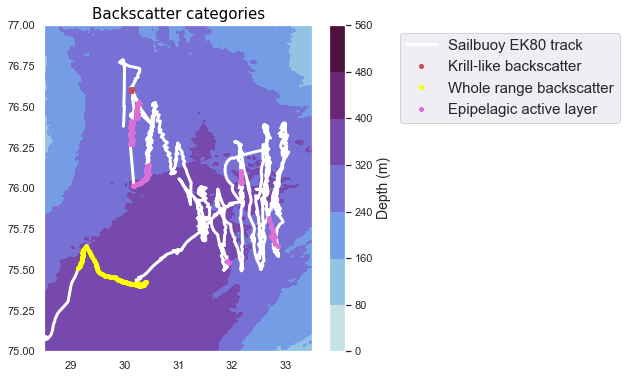

In [243]:
plt.figure(figsize=(6,6))

# Plot
im = plt.contourf(lons,lats,bathy, cmap=cmocean.cm.dense)

cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

plt.plot(SB_Iskant['Long'],SB_Iskant['Lat'], 'w', linewidth=3, label='Sailbuoy EK80 track')

plt.plot(SB_Iskant['Long'][krill_1],SB_Iskant['Lat'][krill_1], '.r', markersize=8, label='Krill-like backscatter')
plt.plot(SB_Iskant['Long'][whole_1],SB_Iskant['Lat'][whole_1], '.', color='yellow', markersize=8, label='Whole range backscatter')
plt.plot(SB_Iskant['Long'][layer],SB_Iskant['Lat'][layer], '.',color = 'orchid', markersize=8, label='Epipelagic active layer')


plt.ylim(lat_lim_zoom)
plt.xlim([28.5, 33.5])

plt.legend(bbox_to_anchor=(1.3,1),fontsize=15)
plt.title('Backscatter categories', title_font)


# Tromsoflaket like as of July 6

Strong surface active layer of zooplankton and small fish

In [244]:
flaket_t1 = pd.to_datetime("2021-7-6 01:00:00Z")
flaket_t2 = pd.to_datetime("2021-7-12 20:00:00Z")
flaket_1 = SB_Iskant.index[(SB_Iskant['time'] > flaket_t1) & (SB_Iskant['time'] < flaket_t2)]

Text(0.5, 1.0, 'Southern backscatter')

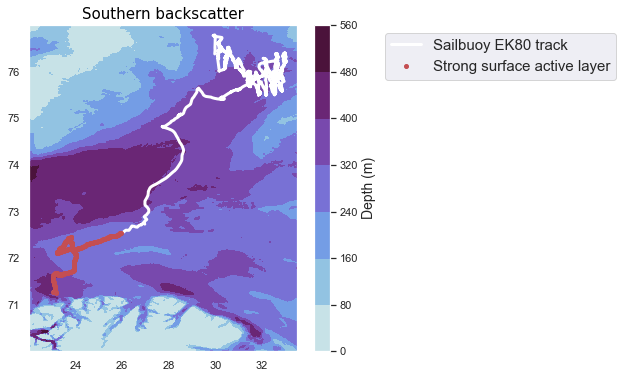

In [249]:
plt.figure(figsize=(6,6))

# Plot
im = plt.contourf(lons,lats,bathy, cmap=cmocean.cm.dense)

cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Depth (m)', fontsize=14)

plt.plot(SB_Iskant['Long'],SB_Iskant['Lat'], 'w', linewidth=3, label='Sailbuoy EK80 track')

plt.plot(SB_Iskant['Long'][flaket_1],SB_Iskant['Lat'][flaket_1], '.r', markersize=8, label='Strong surface active layer')

plt.legend(bbox_to_anchor=(1.3,1),fontsize=15)
plt.title('Southern backscatter', title_font)